---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

- Estudiante: **Mauricio Morales Morales**
- Carné: **997378**
- Grupo: **2**


# `P5` - *Procesos M/M/s*

Es menester tomar una decisión con respecto al número de "servidores" necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 50 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 4$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.

Entonces,

#### A) (40%) Hacer la determinación teórica del número $s$ de servidores necesarios para cumplir el requisito.

Con numero máx > 50 personas en la fila.

$$
P( \text{51 o más personas en la fila} ) = \sum_{i=51}^{\infty} (1 - \rho) \rho^i  = 1 - \sum_{i=0}^{50} (1 - \rho) \rho^i = \rho^{51}
$$

donde:

$$
\rho = \frac{\lambda}{sv}\\
$$

$$
P( \text{51 o más personas en la fila} ) = \left( \frac{\lambda}{sv} \right) ^{51}\\
$$

Tal que el sistema no exceda 50 personas en fila durante el 95% del tiempo de servicio, como:

$$
P( \text{51 o más personas en la fila} ) = \left( \frac{\lambda}{sv} \right) ^{51} \leq 0.05\\
$$

$$
    s^{51} \geq \frac{\lambda^{51}}{0.05v^{51}} 
$$

$$
    s \geq \frac{4}{0.025} \; \sqrt[51]{20}
$$

$$
    s \geq 16.967989
$$

se obtiene s = 17 servidores es el mínimo correspondiente para que el sistema converja. Se debe verificar si cumple con los requerimientos.

#### B) (60%) Modificar el código provisto para simular y corroborar el resultado anterior y crear al menos dos gráficas que muestren esta simulación.

En este caso se sabe que s= 17 servidores es el mínimo a utilizar y como se piden crear dos gráficas se verifica el caso de s = 18 servidores y el que s=17 para cumplir con el requerimiento.


---

Resultado: 17 servidores
Parámetro lambda = 4.0
Parámetro nu = 0.25
Tiempo con más de 49 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 8.42 horas.


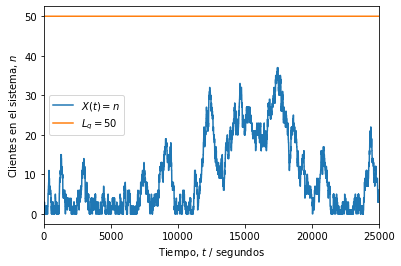

In [1]:
'''Para el caso S = 17 servidores'''
# Se agregan los complementos necesarios.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



# Parámetro de llegada (clientes/segundos)
lam = 4/60

# Número de clientes
N = int(lam*8*3600)

# Parámetro de servicio (servicios/segundos)
nu = 0.25/60

# s es la cantidad de servidores
s = 17

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# nu por la cantidad de servidores
s_nu = s * nu

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/s_nu)

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
t_atencion = []
fin = []

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
for n in range(s):
        inicio = t_llegadas[n]  # Primeras s llegadas
        fin.append(inicio + t_servicio[n])  # Primeras s salidas
        t_atencion.append(inicio)

for i in range(s, N):
    inicio = np.max((t_llegadas[i], np.max(fin[s-i:i])))
    fin.append(inicio + t_servicio[i])
    t_atencion.append(inicio)
    
# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 51

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Resultado: 17 servidores')
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-1)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 25000))
plt.show()



Resultado: 15 servidores
Parámetro lambda = 4.0
Parámetro nu = 0.25
Tiempo con más de 49 solicitudes en fila:
	 33.31%
	 No cumple con la especificación.
Simulación es equivalente a 8.64 horas.


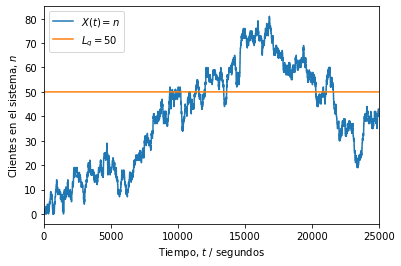

In [2]:
'''Para el caso S = 15 servidores'''
# Se agregan los complementos necesarios.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



# Parámetro de llegada (clientes/segundos)
lam = 4/60

# Número de clientes
N = int(lam*8*3600)

# Parámetro de servicio (servicios/segundos)
nu = 0.25/60

# s es la cantidad de servidores
s = 15

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# nu por la cantidad de servidores
s_nu = s * nu

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/s_nu)

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
t_atencion = []
fin = []

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
for n in range(s):
        inicio = t_llegadas[n]  # Primeras s llegadas
        fin.append(inicio + t_servicio[n])  # Primeras s salidas
        t_atencion.append(inicio)

for i in range(s, N):
    inicio = np.max((t_llegadas[i], np.max(fin[s-i:i])))
    fin.append(inicio + t_servicio[i])
    t_atencion.append(inicio)
    
# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 51

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Resultado: 15 servidores')
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-1)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 25000))
plt.show()


### Análisis de Resultados
- Si la tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 4$ personas por minuto, es necesario 17 o más  servidores para lograr que el sistema atienda 50 o más personas en la fila  al 95% del tiempo de servicio.

- Con una simulación de 17 servidores el sistema converge y cumple , y la gráfica muestra queel sistema no excede las 50 personas en espera.

- En contraste la simulacion de 15 servidores el sistema no cumple, y la grafica muestra se excedieron las 50 personas en la fila.

